<a href="https://colab.research.google.com/github/daniel-muthukrishna/transomaly/blob/master/anomaly_detection_combine_future_predictions_and_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
! pip install astrorapid
! pip install celerite
! pip install keras-tcn

     |████████████████████████████████| 8.3MB 2.3MB/s 
     |████████████████████████████████| 153kB 40.0MB/s 
  Created wheel for extinction: filename=extinction-0.4.0-cp36-cp36m-linux_x86_64.whl size=328511 sha256=ab1c056ab76346359fd944f39877f805aecf7a4acd5a48625256a5edd5e34a21
  Stored in directory: /root/.cache/pip/wheels/f3/b4/65/aac6a9be9d670e4da20675b82671fb1475044408ebcdecfc9b
Successfully built extinction
     |████████████████████████████████| 10.2MB 2.8MB/s 
     |████████████████████████████████| 296kB 34.3MB/s 
     |████████████████████████████████| 378kB 3.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
% cd /content/gdrive/My Drive/Projects/transomaly

/content/gdrive/My Drive/Projects/transomaly


In [4]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Masking, Input, Dropout
import tensorflow_probability as tfp
tfd = tfp.distributions
from tcn import TCN, tcn_full_summary

from transomaly.loss_functions import mean_squared_error, negloglike_with_error


Using TensorFlow backend.


In [5]:
#Unnormalised
X = np.array([np.array([[-133.2419144 ,   84.77628752,   96.34569066,   84.51843003],
       [ 192.78889926,   17.67312651,   84.57637948,   75.21408896],
       [ -66.46134354,  -72.51886713,   47.21046516,   47.94133668],
       [  -2.39017302,   16.90931598,   43.61491929,   50.53910506],
       [  13.24400166,   28.87228189,   33.67101787,   34.37906781],
       [  28.87817634,   39.79549335,   34.67942126,   45.48878878],
       [  41.58403363,   13.61802926,   43.03075186,   49.48907471],
       [  10.10434992,  -54.64973202,   76.71195182,   65.43503892],
       [   8.93342962,   -8.84331949,   61.97323337,   51.12573033],
       [   7.76250933,   36.96309304,   59.16427671,   50.70368076],
       [   6.59158904,   82.76950557,   69.74176297,   64.44232413],
       [   7.90403252,   94.5996101 ,   68.93179412,   58.38084358],
       [  13.23064775,   48.05706453,   43.75090709,   50.50063096],
       [  18.55726299,   31.68243157,   42.52986308,   34.99758448],
       [  38.12950134,   15.30779862,   35.26091327,   36.12679205],
       [  32.72472748,  -21.71171562,   35.68657414,   37.04760162],
       [ -13.89630855,  -39.57907322,   41.87927411,   49.11281168],
       [ -56.77040389,   14.872998  ,   75.24169833,   62.97774544],
       [  -7.4773972 ,   37.2641091 ,   80.60275311,   84.627802  ],
       [ 146.04939586,   53.07144701,   76.73261373,   69.52268704],
       [ 258.44831901,   97.33507535,   72.40517863,   59.52216518],
       [ 334.52045934,  236.29420489,   54.17074412,   45.15398607],
       [ 551.17199257,  449.01215413,   37.34877256,   36.32915082],
       [ 823.93992766,  657.78672741,   37.14077984,   40.19855992],
       [ 994.95145285,  804.82144658,   45.03809297,   45.1370804 ],
       [1001.24520304,  835.92269641,   46.14570868,   44.20333135],
       [ 965.11836096,  867.02394623,   48.23660456,   62.63105554],
       [ 896.67617028,  833.3421103 ,   58.70782563,   54.72949215],
       [ 831.68603894,  722.47880211,   74.92739217,   71.56947384],
       [ 666.74053071,  671.69006295,   76.12828733,   75.38725932],
       [ 508.52240316,  662.96616079,   59.18100571,   65.61994793],
       [ 414.67056969,  537.11982901,   46.21263318,   41.44170173],
       [ 274.37316724,  446.40588495,   30.84964544,   40.20946277],
       [ 208.72327715,  436.44231444,   33.44113543,   36.22060607],
       [ 170.59357019,  362.51357917,   31.50954498,   38.61182395],
       [ 126.44761158,  345.62528276,   39.29707192,   39.22211231],
       [  55.79160384,  366.50265134,   53.99962147,   42.50626466],
       [  -5.55727712,  341.91036088,   77.15425205,   70.37899263],
       [  40.90684209,  240.27000525,   63.08177237,   59.8699683 ],
       [  87.37096131,  138.62964962,   82.26084274,   85.87970091],
       [  13.78646257,  112.58322696,   46.9719049 ,   80.15344456],
       [ -40.55103623,  111.71240102,   39.84769876,   62.34000558],
       [ -23.72079519,  110.84157509,   45.15173764,   50.65082312],
       [  28.69381615,  109.97074915,   38.93228272,   49.62119948],
       [  54.16583333,  108.52524253,   37.9749406 ,   45.59844073],
       [   8.93459775,  106.34045975,   39.52259553,   47.23042072],
       [  60.37770415,  122.22457131,   48.19127779,   47.5293986 ],
       [  66.63633426,  102.54423209,   74.10087929,   58.54962578],
       [  49.37466368,   63.28743779,   96.00977902,   68.14343797]])])
y = np.array([np.array([[ 192.78889926,   17.67312651,   84.57637948,   75.21408896],
       [ -66.46134354,  -72.51886713,   47.21046516,   47.94133668],
       [  -2.39017302,   16.90931598,   43.61491929,   50.53910506],
       [  13.24400166,   28.87228189,   33.67101787,   34.37906781],
       [  28.87817634,   39.79549335,   34.67942126,   45.48878878],
       [  41.58403363,   13.61802926,   43.03075186,   49.48907471],
       [  10.10434992,  -54.64973202,   76.71195182,   65.43503892],
       [   8.93342962,   -8.84331949,   61.97323337,   51.12573033],
       [   7.76250933,   36.96309304,   59.16427671,   50.70368076],
       [   6.59158904,   82.76950557,   69.74176297,   64.44232413],
       [   7.90403252,   94.5996101 ,   68.93179412,   58.38084358],
       [  13.23064775,   48.05706453,   43.75090709,   50.50063096],
       [  18.55726299,   31.68243157,   42.52986308,   34.99758448],
       [  38.12950134,   15.30779862,   35.26091327,   36.12679205],
       [  32.72472748,  -21.71171562,   35.68657414,   37.04760162],
       [ -13.89630855,  -39.57907322,   41.87927411,   49.11281168],
       [ -56.77040389,   14.872998  ,   75.24169833,   62.97774544],
       [  -7.4773972 ,   37.2641091 ,   80.60275311,   84.627802  ],
       [ 146.04939586,   53.07144701,   76.73261373,   69.52268704],
       [ 258.44831901,   97.33507535,   72.40517863,   59.52216518],
       [ 334.52045934,  236.29420489,   54.17074412,   45.15398607],
       [ 551.17199257,  449.01215413,   37.34877256,   36.32915082],
       [ 823.93992766,  657.78672741,   37.14077984,   40.19855992],
       [ 994.95145285,  804.82144658,   45.03809297,   45.1370804 ],
       [1001.24520304,  835.92269641,   46.14570868,   44.20333135],
       [ 965.11836096,  867.02394623,   48.23660456,   62.63105554],
       [ 896.67617028,  833.3421103 ,   58.70782563,   54.72949215],
       [ 831.68603894,  722.47880211,   74.92739217,   71.56947384],
       [ 666.74053071,  671.69006295,   76.12828733,   75.38725932],
       [ 508.52240316,  662.96616079,   59.18100571,   65.61994793],
       [ 414.67056969,  537.11982901,   46.21263318,   41.44170173],
       [ 274.37316724,  446.40588495,   30.84964544,   40.20946277],
       [ 208.72327715,  436.44231444,   33.44113543,   36.22060607],
       [ 170.59357019,  362.51357917,   31.50954498,   38.61182395],
       [ 126.44761158,  345.62528276,   39.29707192,   39.22211231],
       [  55.79160384,  366.50265134,   53.99962147,   42.50626466],
       [  -5.55727712,  341.91036088,   77.15425205,   70.37899263],
       [  40.90684209,  240.27000525,   63.08177237,   59.8699683 ],
       [  87.37096131,  138.62964962,   82.26084274,   85.87970091],
       [  13.78646257,  112.58322696,   46.9719049 ,   80.15344456],
       [ -40.55103623,  111.71240102,   39.84769876,   62.34000558],
       [ -23.72079519,  110.84157509,   45.15173764,   50.65082312],
       [  28.69381615,  109.97074915,   38.93228272,   49.62119948],
       [  54.16583333,  108.52524253,   37.9749406 ,   45.59844073],
       [   8.93459775,  106.34045975,   39.52259553,   47.23042072],
       [  60.37770415,  122.22457131,   48.19127779,   47.5293986 ],
       [  66.63633426,  102.54423209,   74.10087929,   58.54962578],
       [  49.37466368,   63.28743779,   96.00977902,   68.14343797],
       [   0.        ,    0.        ,    0.        ,    0.        ]])])
timesX = np.array([np.array([-70., -67., -64., -61., -58., -55., -52., -49., -46., -43., -40.,
       -37., -34., -31., -28., -25., -22., -19., -16., -13., -10.,  -7.,
        -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.,  23.,  26.,
        29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,  53.,  56.,  59.,
        62.,  65.,  68.,  71.,  74.,  77.])])
objids = np.array(['1_84454778'])

import pickle
with open('data_1_84454778.pickle', 'rb') as f:
    obs_lc = pickle.load(f)

passbands = ('g', 'r')
npb = len(passbands)
contextual_info = ()

COLPB = {'g': 'tab:blue', 'r': 'tab:red'}  # {'g': "#A8C0D7", 'r': "#E08E9E"}

In [6]:
model_base_dir = "/content/gdrive/My Drive/Projects/transomaly/plots/model_linear_spline_with_unc_inXandy_ci()_ns1_c(1,)/"

model_fps = {}
models = {}
y_preds_mean = {}
y_preds_sigma = {}
y_preds_draws = {}
npreds = range(1, 50)
for npred in npreds:
    print(npred)
    epochs = 2000
                                        
    model_fps[npred] = model_base_dir + f"keras_model_epochs{epochs}_mcdropout_TCN_probabilistic_bayesianTrue_uncertaintiesTrue_predictfuture{npred}point_normalisedFalse_dropout0.2_units30_batchsize64_lr0.001/keras_model_epochs{epochs}_mcdropout_TCN_probabilistic_bayesianTrue_uncertaintiesTrue_predictfuture{npred}point_normalisedFalse_dropout0.2_units30_batchsize64_lr0.001.hdf5"
    models[npred] = load_model(model_fps[npred], custom_objects={'loss': negloglike_with_error(), 'TCN': TCN})
    tidx = -npred+1 if npred != 1 else None

    sampled_ypred = []
    sampled_ystd = []
    draws = []
    ns = 100
    for drawidx in range(ns):
        sampled_yhat = models[npred](X[:,:tidx,:])
        sampled_ypred.append(np.asarray(sampled_yhat.mean()))
        sampled_ystd.append(np.asarray(sampled_yhat.stddev()))
        draws.append(np.random.normal(sampled_yhat.mean(), sampled_yhat.stddev()))
    y_preds_mean[npred] = np.mean(np.array(draws), axis=0)
    y_preds_sigma[npred] = np.std(np.array(draws), axis=0)
    y_preds_draws[npred] = np.array(draws)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


KeyboardInterrupt: ignored

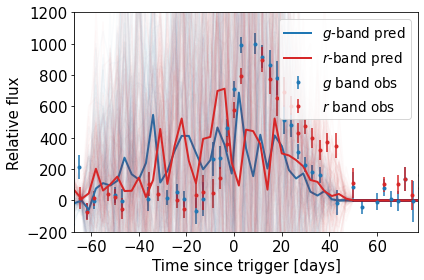

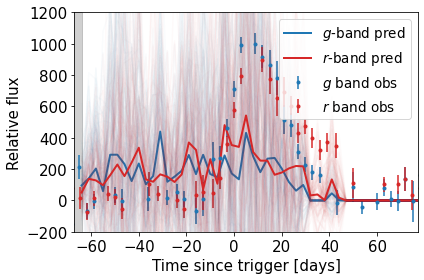

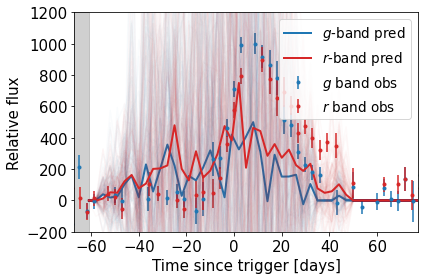

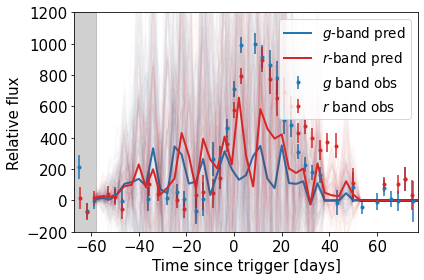

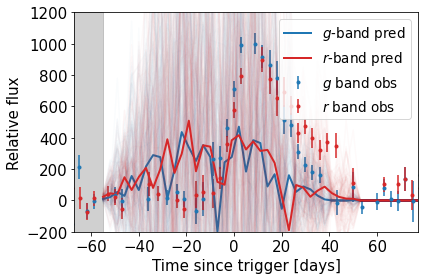

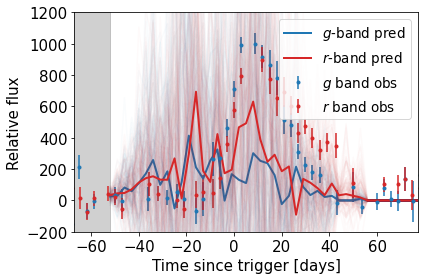

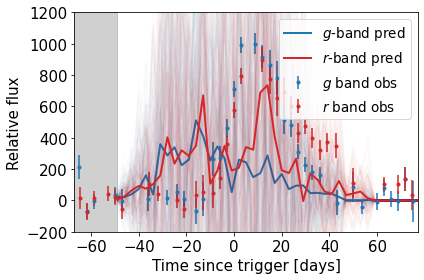

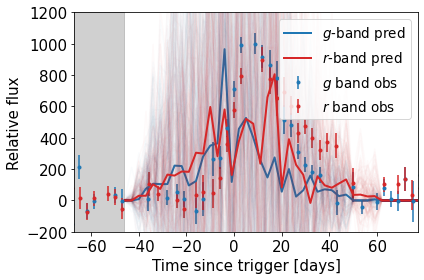

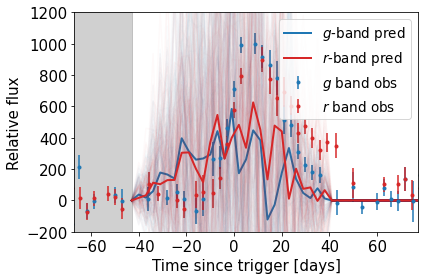

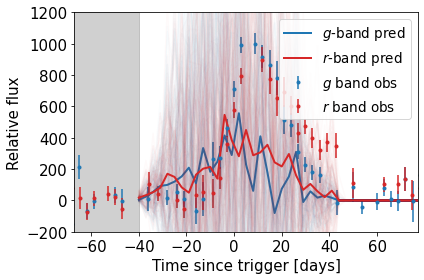

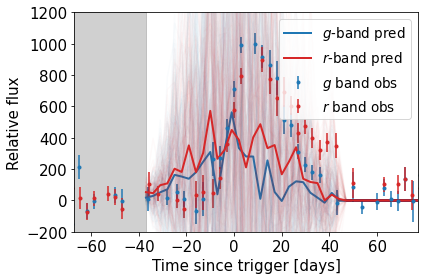

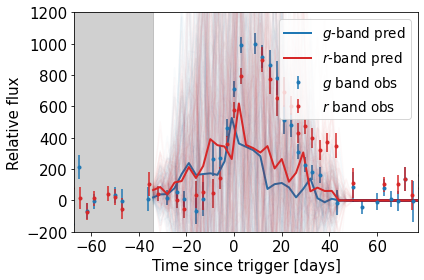

In [7]:
sidx = 0
for p in np.arange(0, 49, 1): #range(49):
    tidx = -npred+1 if npred != 1 else None
    plot_ypred = np.zeros((49-p, npb))
    plot_ypred_draws = np.zeros((ns, 49-p, npb))
    for npred in range(1, 50-p):
        # plot_ypred[npred-1,:] = y_preds_mean[npred][sidx][p,:]
        plot_ypred[npred-1,:] = np.median(y_preds_draws[npred], axis=0)[sidx, p,:]
        plot_ypred_draws[:, npred-1, :] = y_preds_draws[npred][:,sidx,p,:]

    fig, (ax1) = plt.subplots(nrows=1, ncols=1)

    for pbidx, pb in enumerate(passbands):
        plotlabeltest = "${}$-band input".format(pb)
        plotlabelpred = "${}$-band pred".format(pb)

        for drawidx in range(ns):
            # import pdb; pdb.set_trace()
            ax1.plot(timesX[sidx][1+p:], plot_ypred_draws[drawidx][:, pbidx], color=COLPB[pb], alpha=0.02)

        pbmask = obs_lc['passband'] == pb
        ax1.errorbar(obs_lc[pbmask]['time'].data, obs_lc[pbmask]['flux'].data, yerr=obs_lc[pbmask]['fluxErr'].data, label=f'${pb}$ band obs', fmt='.', color=COLPB[pb])
        # ax1.plot(timesX[sidx][1:], y[sidx][:, pbidx], c=COLPB[pb], lw=2, label=plotlabeltest, marker=None, markersize=10, alpha=1, linestyle='-')
        ax1.plot(timesX[sidx][1+p:], plot_ypred[:, pbidx], c=COLPB[pb], lw=2, label=plotlabelpred, marker=None, markersize=10, alpha=1, linestyle='-')
        # ax1.axvspan(timesX[sidx][1+p], timesX[sidx][-1], alpha=0.2, color='grey')
        ax1.axvspan(timesX[sidx][0], timesX[sidx][1+p], alpha=0.2, color='grey')


    ax1.set_ylabel("Relative flux", fontsize=15)
    ax1.set_xlabel("Time since trigger [days]", fontsize=15)
    ax1.legend(fontsize=13.5)
    plt.xlim(-67, 77)
    plt.ylim(-200, 1200)  #
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    figdir = '/content/gdrive/My Drive/Projects/transomaly/plots/model_linear_spline_with_unc_inXandy_ci()_ns1_c(1,)/combine_to_from_lc_seq_predictions/'
    if not os.path.isdir(figdir):
        os.makedirs(figdir)
    plt.savefig(figdir+f'predict-given-{p+1}-timesteps-{objids[0]}.png')



In [ ]:
# Generate light curve from predictions sequentially
model_base_dir = "/content/gdrive/My Drive/Projects/transomaly/plots/model_linear_spline_with_unc_inXandy_ci()_ns1_c(1,)/"
npb = len(passbands)
npred = 1
sidx = 0
epochs = 4000

model_fp = model_base_dir + f"keras_model_epochs{epochs}_mcdropout_TCN_probabilistic_bayesianTrue_uncertaintiesTrue_predictfuture{npred}point_normalisedFalse_dropout0.2_units30_batchsize64_lr0.001/keras_model_epochs{epochs}_mcdropout_TCN_probabilistic_bayesianTrue_uncertaintiesTrue_predictfuture{npred}point_normalisedFalse_dropout0.2_units30_batchsize64_lr0.001.hdf5"
model = load_model(model_fp, custom_objects={'loss': negloglike_with_error(), 'TCN': TCN})
tidx = -npred+1 if npred != 1 else None

for p in range(22, 23, 1):
    print("p is", p)
    sampled_ypred = []
    sampled_ystd = []
    draws = []
    ns = 100
    for drawidx in range(ns):
        sampled_yhat = model(X[:,:tidx,:])
        sampled_ypred.append(np.asarray(sampled_yhat.mean()))
        sampled_ystd.append(np.asarray(sampled_yhat.stddev()))
        draws.append(np.random.normal(sampled_yhat.mean(), sampled_yhat.stddev()))
    y_pred_mean = np.mean(np.array(draws), axis=0)
    y_pred_sigma = np.std(np.array(draws), axis=0)
    y_pred_draws = np.array(draws)
    y_pred_median = np.median(y_pred_draws, axis=0)


    y_pred_median_part = np.copy(y_pred_median)
    y_pred_sigma_part = np.copy(y_pred_sigma)
    X_part = np.copy(X)

    # Zero out data after p'th index
    X_part[sidx, :, :][p:] = 0


    for i in range(49 - p):
        print(i)
        import pdb; pdb.set_trace()
        X_part[sidx, :, :npb][p + i] = y_pred_median_part[sidx, :, :npb][p + i - 1]
        X_part[sidx, :, npb:][p + i] = y_pred_sigma_part[sidx, :, :npb][p + i - 1]
        end = max(p+i + 1, 49)   # if p+i >= 49 else 49
        start = max(p+i - 49 + 1, 0)  # if p+i >= 49 else 0

        sampled_ypred = []
        sampled_ystd = []
        draws = []
        for drawidx in range(ns):
            sampled_yhat_part = model(X_part[:,start:end])
            sampled_ypred.append(np.asarray(sampled_yhat_part.mean()))
            sampled_ystd.append(np.asarray(sampled_yhat_part.stddev()))
            draws.append(np.random.normal(sampled_yhat_part.mean(), sampled_yhat_part.stddev()))
        # y_pred_mean[sidx][p+i] = np.mean(np.array(draws), axis=0)[:, p + i]
        import pdb; pdb.set_trace()
        y_pred_median_part[:,start:end] = np.median(np.array(draws), axis=0)
        y_pred_sigma_part[:,start:end] = np.std(np.array(draws), axis=0)
        y_pred_median[sidx][p+i] = y_pred_median_part[sidx][p + i]
        y_pred_sigma[sidx][p+i] = y_pred_sigma_part[sidx][p + i]
        y_pred_draws[:, sidx, p+i] = np.array(draws)[:, sidx, p+i]

    fig, (ax1) = plt.subplots(nrows=1, ncols=1)
    for pbidx, pb in enumerate(passbands):
        plotlabeltest = "${}$-band input".format(pb)
        plotlabelpred = "${}$-band pred".format(pb)

        for drawidx in range(ns):
            ax1.plot(timesX[sidx][1:], y_pred_draws[drawidx][sidx][:, pbidx], color=COLPB[pb], alpha=0.05)

        pbmask = obs_lc['passband'] == pb
        ax1.errorbar(obs_lc[pbmask]['time'].data, obs_lc[pbmask]['flux'].data, yerr=obs_lc[pbmask]['fluxErr'].data, label=f'${pb}$ band obs', fmt='.', color=COLPB[pb])
        # ax1.plot(timesX[sidx][1:], y[sidx][:, pbidx], c=COLPB[pb], lw=1, label=plotlabeltest, marker='.', markersize=10, alpha=1, linestyle='-')
        ax1.plot(timesX[sidx][1:], y_pred_median[sidx][:, pbidx], c=COLPB[pb], lw=2, label=plotlabelpred, marker=None, markersize=10, alpha=1, linestyle='-')
        ax1.axvspan(timesX[sidx][1], timesX[sidx][p-1], alpha=0.2, color='grey')


    ax1.set_ylabel("Relative flux", fontsize=15)
    ax1.set_xlabel("Time since trigger [days]", fontsize=15)
    ax1.legend(fontsize=13.5, loc='upper left')
    plt.xlim(-67, 77)
    plt.ylim(-200, 1200)  #
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    figdir = model_base_dir + f"keras_model_epochs{epochs}_mcdropout_TCN_probabilistic_bayesianTrue_uncertaintiesTrue_predictfuture{npred}point_normalisedFalse_dropout0.2_units30_batchsize64_lr0.001/"
    plt.savefig(figdir+f'generate-lightcurve-reinputting-predictions-{p+1}-timesteps-{objids[0]}.png')

p is 22
0
> <ipython-input-12-09e4057a834a>(40)<module>()
-> X_part[sidx, :, :npb][p + i] = y_pred_median_part[sidx, :, :npb][p + i - 1]
(Pdb) X_part
array([[[-133.2419144 ,   84.77628752,   96.34569066,   84.51843003],
        [ 192.78889926,   17.67312651,   84.57637948,   75.21408896],
        [ -66.46134354,  -72.51886713,   47.21046516,   47.94133668],
        [  -2.39017302,   16.90931598,   43.61491929,   50.53910506],
        [  13.24400166,   28.87228189,   33.67101787,   34.37906781],
        [  28.87817634,   39.79549335,   34.67942126,   45.48878878],
        [  41.58403363,   13.61802926,   43.03075186,   49.48907471],
        [  10.10434992,  -54.64973202,   76.71195182,   65.43503892],
        [   8.93342962,   -8.84331949,   61.97323337,   51.12573033],
        [   7.76250933,   36.96309304,   59.16427671,   50.70368076],
        [   6.59158904,   82.76950557,   69.74176297,   64.44232413],
        [   7.90403252,   94.5996101 ,   68.93179412,   58.38084358],
        [ 

ValueError: ignored

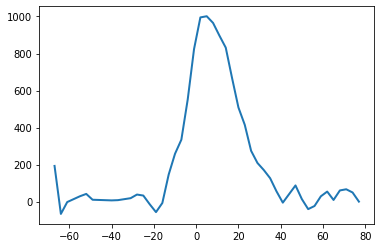

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
for pbidx, pb in enumerate(passbands): 
    # import pdb; pdb.set_trace()
    ax1.plot(timesX[0][1:], y[0][:, pbidx], c=COLPB[pb], lw=2, 
              label=plotlabeltest, marker=None, markersize=10, alpha=1, linestyle='-')
    ax1.plot(timesX[0][1+p:], y_pred[0][:, pbidx], c=COLPB[pb], lw=2,
              label=plotlabelpred, marker=None, markersize=10, alpha=1, linestyle=':')
    ax1.axvspan(timesX[sidx][1+p], timesX[sidx][-1], alpha=0.2, color='grey')

In [ ]:

y_predict = model.predict(X)
y_predict_part = np.copy(y_predict)
X_part = np.copy(X)
p = 20
X_part[0, :, 1][p:] = 0
X_part[0, :, 0][p:] = 0

# Append zeros to end to have longer predictions
nfuture = 100
timesX_future = np.array([np.arange(-70,80+3*nfuture,3.)])
y_predict = np.hstack((y_predict, np.zeros((1,nfuture,2))))
X_part = np.hstack((X_part, np.zeros((1,nfuture,3))))
y_predict_part = np.hstack((y_predict_part, np.zeros((1,nfuture,2))))

for i in range(49 - p + nfuture):
       X_part[0, :, 1][p + i] = y_predict_part[0, :, 1][p-1 + i]
       X_part[0, :, 0][p + i] = y_predict_part[0, :, 0][p-1 + i]
       end = max(p+i + 1, 49)   # if p+i >= 49 else 49
       start = max(p+i - 49 + 1, 0)  # if p+i >= 49 else 0
       y_predict_part[:,start:end] = model.predict(X_part[:,start:end])
       y_predict[0][p + i] = y_predict_part[0][p + i]


idx = 0
sidx = 0

argmax = None  # self.timesX[idx].argmax() + 1


fig, (ax1) = plt.subplots(nrows=1, ncols=1)

for pbidx, pb in enumerate(passbands):
    plotlabeltest = "ytest:{}".format(pb)
    plotlabelpred = "ypred:{}".format(pb)
    marker = None  # MARKPB[pb] if s == 0 else None
    ax1.plot(timesX[sidx][1:][:argmax], y[sidx][:, pbidx][:argmax], c=COLPB[pb], lw=1,
             label=plotlabeltest, marker=None, markersize=10, alpha=1, linestyle='-')
    ax1.plot(timesX_future[sidx][1:][:argmax], y_predict[sidx][:, pbidx][:argmax], c=COLPB[pb], lw=1,
             label=plotlabelpred, marker=None, markersize=10, alpha=1, linestyle=':')
    ax1.axvspan(timesX_future[sidx][p], timesX_future[sidx][-1], alpha=0.2, color='grey')

    # pbmask = lc['passband'] == pb
    # sortedidx = np.argsort(lc[pbmask]['time'].data)
    # time = lc[pbmask]['time'].data[sortedidx]
    # flux = lc[pbmask]['flux'].data[sortedidx]
    # fluxerr = lc[pbmask]['fluxErr'].data[sortedidx]

    # ax1.errorbar(time, flux, yerr=fluxerr,
    #              fmt=".", capsize=0, color=COLPB[pb], label='_nolegend_')

ax1.set_ylabel("Relative flux")
ax1.set_xlabel("Time since trigger [days]")
ax1.legend()
plt.savefig(f'predict-several-timesteps-{objids[0]}.png')
plt.show()



In [ ]:
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as spline

class ErrorPropagationSpline(object):
    """
    Does a spline fit, but returns both the spline value and associated uncertainty.
    https://gist.github.com/thriveth/4680e3d3cd2cfe561a57
    """
    def __init__(self, x, y, yerr, N=1000, *args, **kwargs):
        """
        See docstring for InterpolatedUnivariateSpline
        """
        yy = np.vstack([y + np.random.normal(loc=0, scale=yerr) for i in range(N)]).T
        self._splines = [spline(x, yy[:, i], *args, **kwargs) for i in range(N)]

    def __call__(self, x, *args, **kwargs):
        """
        Get the spline value and uncertainty at point(s) x. args and kwargs are passed to spline.__call__
        :param x:
        :return: a tuple with the mean value at x and the standard deviation
        """
        x = np.atleast_1d(x)
        s = np.vstack([curve(x, *args, **kwargs) for curve in self._splines])
        return (np.mean(s, axis=0), np.std(s, axis=0))

In [ ]:
x = [1,5,9,13,15,19,23]
y = [2,4,8,10,20,25,30]
yerr = [1,2,3,20,4,4,4]
xnew = [2,4,6,8,9.5,10,11,12,12.5,13.5,14]

import scipy.interpolate
spl = ErrorPropagationSpline(x,y, yerr, k=1, N=100)
ynew, ynewerr = spl(xnew)

print(spl(xnew))

import matplotlib.pyplot as plt
plt.errorbar(x,y,yerr, fmt='o')
plt.errorbar(xnew,ynew,ynewerr, fmt='x-')

In [ ]:
#@title Old example LC inputs

#Unnormalised
X = np.array([np.array([[  0.96257583,   1.42432411],
       [  1.13088831,   1.69629478],
       [  1.39808094,   1.87524256],
       [  1.46783211,   1.78057344],
       [  1.84913609,   1.87076625],
       [  1.84513484,   1.99878845],
       [  2.09974785,   1.97161133],
       [  1.98874768,   2.15566167],
       [  2.05270289,   1.79410231],
       [  2.3087706 ,   1.75268052],
       [  2.25759958,   1.75678886],
       [  2.31640483,   1.76267448],
       [  2.23976565,   2.1023498 ],
       [  2.67430547,   3.11197518],
       [  3.99679885,   5.39137051],
       [  6.77493994,   9.07416083],
       [ 11.61173312,  16.54629113],
       [ 21.14999134,  30.71807361],
       [ 42.7582918 ,  55.71438352],
       [ 80.67390143,  97.04691988],
       [131.15425118, 152.03806048],
       [190.56889422, 212.7394347 ],
       [257.54421609, 278.91933656],
       [321.82506092, 342.84847808],
       [351.41634912, 384.82254579],
       [336.59977069, 391.25203119],
       [300.38998169, 377.40658161],
       [253.95046044, 350.14770003],
       [205.83583558, 313.70995445],
       [160.45516874, 275.03043309],
       [121.49800632, 237.37933753],
       [ 90.84580106, 202.49580528],
       [ 68.6118131 , 172.12264983],
       [ 53.55826484, 146.63998392],
       [ 44.41242861, 125.19882914],
       [ 37.31858977, 107.54329129],
       [ 32.10264437,  92.55183674],
       [ 27.7889624 ,  79.57641425],
       [ 24.99591378,  69.99529386],
       [ 22.42827772,  62.13316417],
       [ 20.7022734 ,  55.38378175],
       [ 18.19245689,  49.22229192],
       [ 16.17997694,  44.03154646],
       [ 14.31348959,  39.27521769],
       [ 12.21050763,  34.6983622 ],
       [ 10.67950816,  30.85880197],
       [  9.07877783,  26.95581072],
       [  7.64941785,  23.55952275],
       [  6.24272033,  19.91358795]])])
y = np.array([np.array([[  1.13088831,   1.69629478],
       [  1.39808094,   1.87524256],
       [  1.46783211,   1.78057344],
       [  1.84913609,   1.87076625],
       [  1.84513484,   1.99878845],
       [  2.09974785,   1.97161133],
       [  1.98874768,   2.15566167],
       [  2.05270289,   1.79410231],
       [  2.3087706 ,   1.75268052],
       [  2.25759958,   1.75678886],
       [  2.31640483,   1.76267448],
       [  2.23976565,   2.1023498 ],
       [  2.67430547,   3.11197518],
       [  3.99679885,   5.39137051],
       [  6.77493994,   9.07416083],
       [ 11.61173312,  16.54629113],
       [ 21.14999134,  30.71807361],
       [ 42.7582918 ,  55.71438352],
       [ 80.67390143,  97.04691988],
       [131.15425118, 152.03806048],
       [190.56889422, 212.7394347 ],
       [257.54421609, 278.91933656],
       [321.82506092, 342.84847808],
       [351.41634912, 384.82254579],
       [336.59977069, 391.25203119],
       [300.38998169, 377.40658161],
       [253.95046044, 350.14770003],
       [205.83583558, 313.70995445],
       [160.45516874, 275.03043309],
       [121.49800632, 237.37933753],
       [ 90.84580106, 202.49580528],
       [ 68.6118131 , 172.12264983],
       [ 53.55826484, 146.63998392],
       [ 44.41242861, 125.19882914],
       [ 37.31858977, 107.54329129],
       [ 32.10264437,  92.55183674],
       [ 27.7889624 ,  79.57641425],
       [ 24.99591378,  69.99529386],
       [ 22.42827772,  62.13316417],
       [ 20.7022734 ,  55.38378175],
       [ 18.19245689,  49.22229192],
       [ 16.17997694,  44.03154646],
       [ 14.31348959,  39.27521769],
       [ 12.21050763,  34.6983622 ],
       [ 10.67950816,  30.85880197],
       [  9.07877783,  26.95581072],
       [  7.64941785,  23.55952275],
       [  6.24272033,  19.91358795],
       [  4.79187537,  16.25118602]])])
#Normalised
Xn = np.array([np.array([[0.09158034, 0.07176773],
       [0.09008677, 0.07137485],
       [0.08917016, 0.0727186 ],
       [0.09029362, 0.07340094],
       [0.08999084, 0.07224263],
       [0.08900606, 0.07197019],
       [0.08739904, 0.07095805],
       [0.08682939, 0.07071227],
       [0.08567506, 0.07031706],
       [0.08386102, 0.07021409],
       [0.0836062 , 0.0698832 ],
       [0.08332578, 0.07050169],
       [0.08397429, 0.06937913],
       [0.0860095 , 0.0716971 ],
       [0.09076107, 0.07780995],
       [0.09871331, 0.08934081],
       [0.11663096, 0.11012718],
       [0.15700709, 0.15327507],
       [0.23417453, 0.22872161],
       [0.35862168, 0.33963544],
       [0.51792838, 0.48456903],
       [0.68616083, 0.64401235],
       [0.81866526, 0.79203408],
       [0.90768435, 0.89154676],
       [0.93726188, 0.94250969],
       [0.92312219, 0.95238174],
       [0.85896026, 0.93542825],
       [0.74499556, 0.87812468],
       [0.62114839, 0.78786493],
       [0.50529031, 0.6932507 ],
       [0.40645818, 0.6036984 ],
       [0.32993884, 0.52479434],
       [0.27163636, 0.45807863],
       [0.22780797, 0.40140124],
       [0.19817062, 0.35339631],
       [0.17674938, 0.31370617],
       [0.16142444, 0.27973599],
       [0.14923072, 0.25118097],
       [0.13910386, 0.22674725],
       [0.13288632, 0.20717057],
       [0.12727512, 0.191151  ],
       [0.12253798, 0.17674126],
       [0.11748478, 0.16368262],
       [0.11428479, 0.15247652],
       [0.110435  , 0.14285344],
       [0.10726069, 0.13410306],
       [0.10317767, 0.12546451],
       [0.10019489, 0.11729226],
       [0.09654251, 0.11025106]])])
yn = np.array([np.array([[0.09008677, 0.07137485],
       [0.08917016, 0.0727186 ],
       [0.09029362, 0.07340094],
       [0.08999084, 0.07224263],
       [0.08900606, 0.07197019],
       [0.08739904, 0.07095805],
       [0.08682939, 0.07071227],
       [0.08567506, 0.07031706],
       [0.08386102, 0.07021409],
       [0.0836062 , 0.0698832 ],
       [0.08332578, 0.07050169],
       [0.08397429, 0.06937913],
       [0.0860095 , 0.0716971 ],
       [0.09076107, 0.07780995],
       [0.09871331, 0.08934081],
       [0.11663096, 0.11012718],
       [0.15700709, 0.15327507],
       [0.23417453, 0.22872161],
       [0.35862168, 0.33963544],
       [0.51792838, 0.48456903],
       [0.68616083, 0.64401235],
       [0.81866526, 0.79203408],
       [0.90768435, 0.89154676],
       [0.93726188, 0.94250969],
       [0.92312219, 0.95238174],
       [0.85896026, 0.93542825],
       [0.74499556, 0.87812468],
       [0.62114839, 0.78786493],
       [0.50529031, 0.6932507 ],
       [0.40645818, 0.6036984 ],
       [0.32993884, 0.52479434],
       [0.27163636, 0.45807863],
       [0.22780797, 0.40140124],
       [0.19817062, 0.35339631],
       [0.17674938, 0.31370617],
       [0.16142444, 0.27973599],
       [0.14923072, 0.25118097],
       [0.13910386, 0.22674725],
       [0.13288632, 0.20717057],
       [0.12727512, 0.191151  ],
       [0.12253798, 0.17674126],
       [0.11748478, 0.16368262],
       [0.11428479, 0.15247652],
       [0.110435  , 0.14285344],
       [0.10726069, 0.13410306],
       [0.10317767, 0.12546451],
       [0.10019489, 0.11729226],
       [0.09654251, 0.11025106],
       [0.09630747, 0.10437187]])])
#Normalised object 1_6222236
Xn = np.array([np.array([[0.00448964, 0.        ],
       [0.        , 0.02469979],
       [0.00713832, 0.0510595 ],
       [0.02991802, 0.08449011],
       [0.05011106, 0.09195332],
       [0.05702283, 0.07957474],
       [0.05513788, 0.05611958],
       [0.04902122, 0.0294538 ],
       [0.04288751, 0.00993177],
       [0.04127183, 0.01818543],
       [0.05353569, 0.04212558],
       [0.06324364, 0.06195425],
       [0.05741975, 0.07571231],
       [0.03920042, 0.08415738],
       [0.02232076, 0.08873083],
       [0.01912765, 0.08509039],
       [0.03159054, 0.07017496],
       [0.04909139, 0.05580469],
       [0.06360378, 0.05487265],
       [0.08042658, 0.08175915],
       [0.14612581, 0.15545786],
       [0.32463802, 0.29112003],
       [0.5616513 , 0.4847463 ],
       [0.78721409, 0.70134517],
       [0.94289831, 0.88820695],
       [1.        , 0.98685417],
       [0.9617599 , 1.        ],
       [0.84395464, 0.95538324],
       [0.70269411, 0.87417796],
       [0.56370832, 0.77777756],
       [0.43422203, 0.6788543 ],
       [0.31954263, 0.58431753],
       [0.22572829, 0.5003608 ],
       [0.15997532, 0.43230079],
       [0.13003542, 0.3766077 ],
       [0.11756719, 0.32962512],
       [0.1001643 , 0.29821954],
       [0.08371692, 0.28562479],
       [0.07356015, 0.27645137],
       [0.06571214, 0.2572178 ],
       [0.05947788, 0.23700196],
       [0.05453582, 0.21703187],
       [0.05062684, 0.19788037],
       [0.04754242, 0.17990707],
       [0.04511494, 0.16331596],
       [0.04320991, 0.14819947],
       [0.04171951, 0.1345717 ],
       [0.04055748, 0.12239351],
       [0.03965491, 0.11159111]])])
yn = np.array([np.array([[0.        , 0.02469979],
       [0.00713832, 0.0510595 ],
       [0.02991802, 0.08449011],
       [0.05011106, 0.09195332],
       [0.05702283, 0.07957474],
       [0.05513788, 0.05611958],
       [0.04902122, 0.0294538 ],
       [0.04288751, 0.00993177],
       [0.04127183, 0.01818543],
       [0.05353569, 0.04212558],
       [0.06324364, 0.06195425],
       [0.05741975, 0.07571231],
       [0.03920042, 0.08415738],
       [0.02232076, 0.08873083],
       [0.01912765, 0.08509039],
       [0.03159054, 0.07017496],
       [0.04909139, 0.05580469],
       [0.06360378, 0.05487265],
       [0.08042658, 0.08175915],
       [0.14612581, 0.15545786],
       [0.32463802, 0.29112003],
       [0.5616513 , 0.4847463 ],
       [0.78721409, 0.70134517],
       [0.94289831, 0.88820695],
       [1.        , 0.98685417],
       [0.9617599 , 1.        ],
       [0.84395464, 0.95538324],
       [0.70269411, 0.87417796],
       [0.56370832, 0.77777756],
       [0.43422203, 0.6788543 ],
       [0.31954263, 0.58431753],
       [0.22572829, 0.5003608 ],
       [0.15997532, 0.43230079],
       [0.13003542, 0.3766077 ],
       [0.11756719, 0.32962512],
       [0.1001643 , 0.29821954],
       [0.08371692, 0.28562479],
       [0.07356015, 0.27645137],
       [0.06571214, 0.2572178 ],
       [0.05947788, 0.23700196],
       [0.05453582, 0.21703187],
       [0.05062684, 0.19788037],
       [0.04754242, 0.17990707],
       [0.04511494, 0.16331596],
       [0.04320991, 0.14819947],
       [0.04171951, 0.1345717 ],
       [0.04055748, 0.12239351],
       [0.03965491, 0.11159111],
       [0.03895684, 0.10206975]])])
timesX = np.array([np.array([-70., -67., -64., -61., -58., -55., -52., -49., -46., -43., -40.,
       -37., -34., -31., -28., -25., -22., -19., -16., -13., -10.,  -7.,
        -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.,  23.,  26.,
        29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,  53.,  56.,  59.,
        62.,  65.,  68.,  71.,  74.,  77.])])
objids = np.array(['median_Ia'])
objids = np.array(['1_84454778'])

passbands = ('g', 'r')
npb = len(passbands)
contextual_info = ()

COLPB = {'g': 'tab:blue', 'r': 'tab:red'}  # {'g': "#A8C0D7", 'r': "#E08E9E"}